<a href="https://colab.research.google.com/github/Aisyhnabilaaa/PCD-DOMAIN-FREKUENSI/blob/main/domain_frekuensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

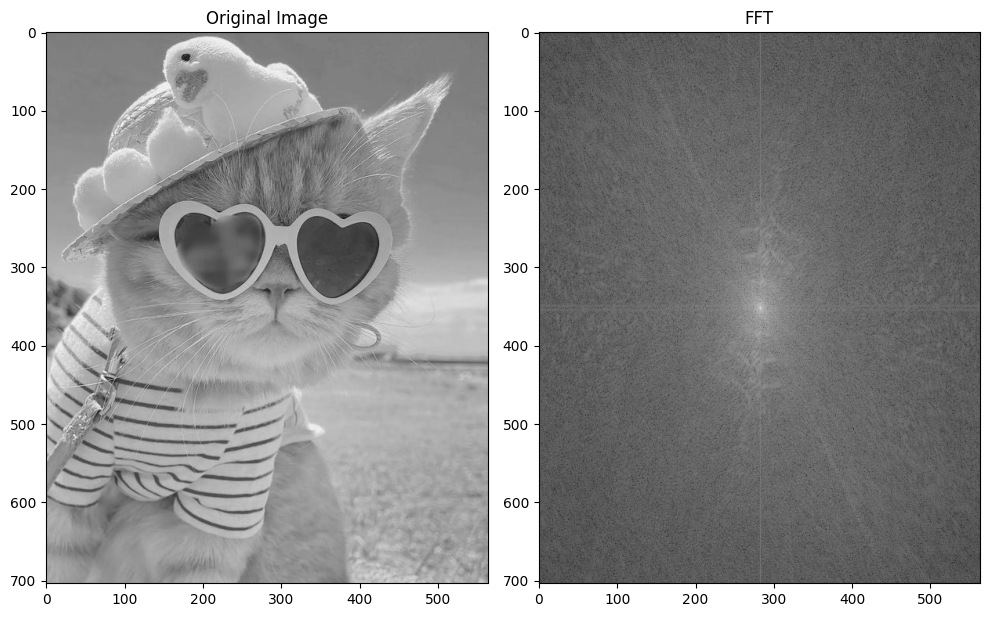

In [ ]:

# Load gambar dalam skala abu-abu
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan transformasi Fourier
fft = np.fft.fft2(image)
shifted_fft = np.fft.fftshift(fft)

# Menghitung spektrum amplitudo
magnitude_spectrum = 20 * np.log(np.abs(shifted_fft))

# Menampilkan gambar asli dan spektrum amplitudo
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT')

plt.tight_layout()
plt.show()

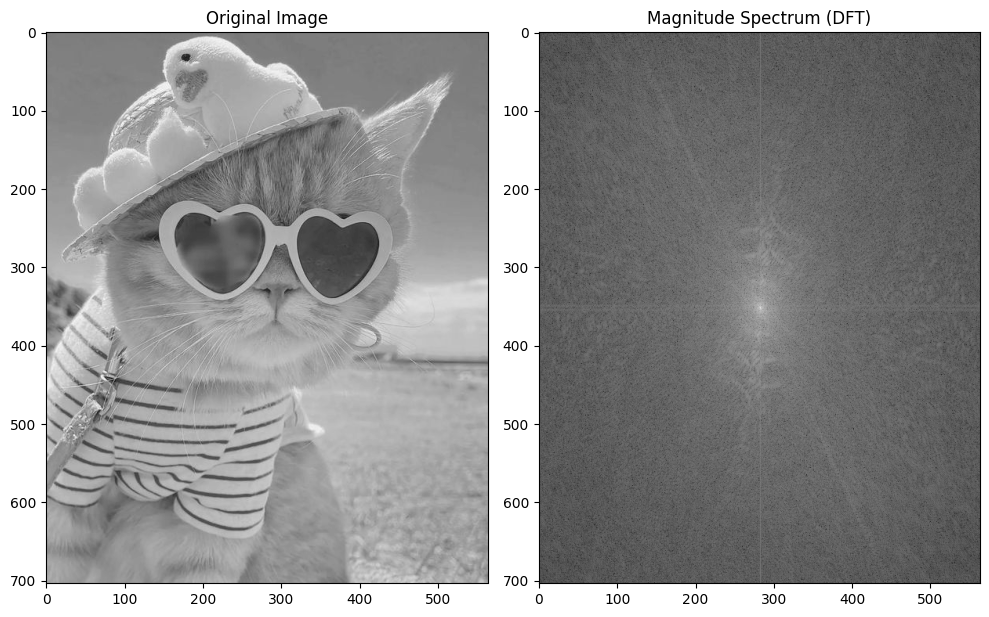

In [ ]:
# Load the image
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the DFT
dft = np.fft.fft2(image)

# Shift the zero-frequency component to the center of the spectrum
dft_shifted = np.fft.fftshift(dft)

# Compute the magnitude spectrum (logarithmic scale)
magnitude_spectrum = 20 * np.log(np.abs(dft_shifted))

# Display the original image and its magnitude spectrum
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (DFT)')

plt.tight_layout()
plt.show()

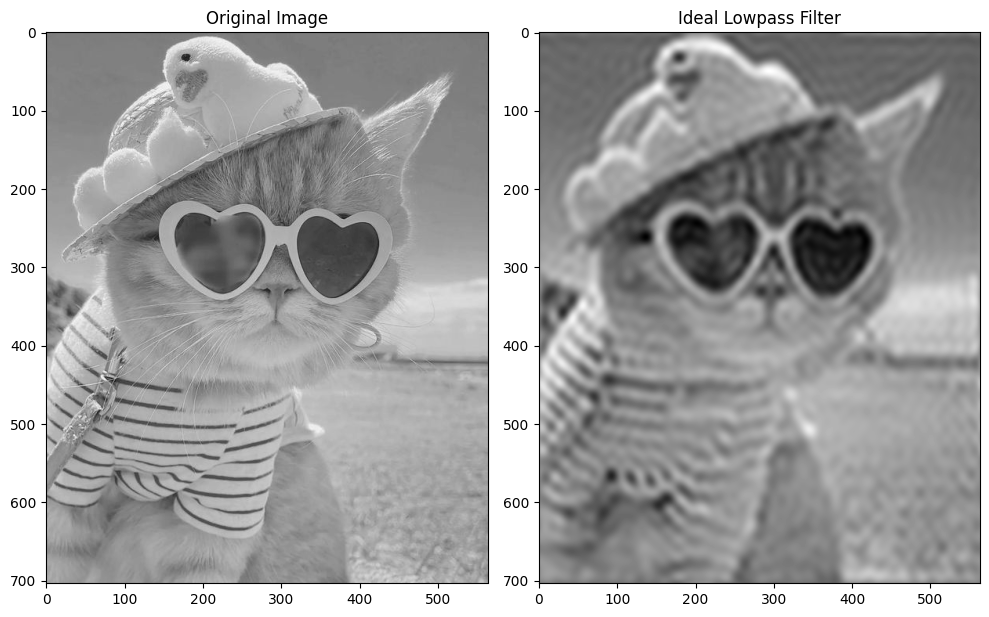

In [ ]:

# Load gambar dalam skala abu-abu
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan transformasi Fourier
fft = np.fft.fft2(image)
shifted_fft = np.fft.fftshift(fft)

# Membuat filter lowpass
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 30  # Radius cutoff frekuensi
mask = np.zeros((rows, cols), np.uint8)
mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1

# Mengalikan filter dengan spektrum Fourier
filtered_fft = shifted_fft * mask

# Menggeser kembali hasil filter
filtered_fft_shift = np.fft.ifftshift(filtered_fft)

# Melakukan inverse Fourier transform
filtered_image = np.fft.ifft2(filtered_fft_shift)
filtered_image = np.abs(filtered_image)

# Menampilkan gambar asli dan gambar hasil filter
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Ideal Lowpass Filter')

plt.tight_layout()
plt.show()

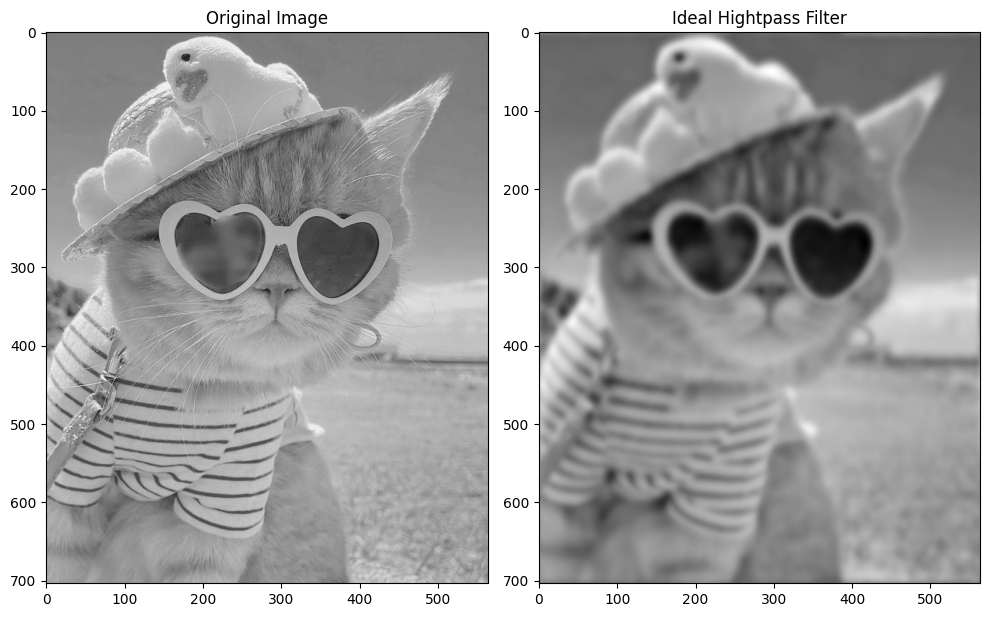

In [5]:


# Load gambar dalam skala abu-abu
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan transformasi Fourier
fft = np.fft.fft2(image)
shifted_fft = np.fft.fftshift(fft)

# Membuat filter Butterworth lowpass
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
cutoff_frequency = 30  # Cutoff frequency
order = 2  # Order of the Butterworth filter

# Menghitung jarak dari setiap piksel terhadap titik tengah
distance = np.sqrt((np.arange(-crow, rows - crow)[:, np.newaxis] ** 2) + (np.arange(-ccol, cols - ccol) ** 2))

# Membuat filter Butterworth
butterworth_filter = 1 / (1 + (distance / cutoff_frequency) ** (2 * order))

# Mengalikan filter dengan spektrum Fourier
filtered_fft = shifted_fft * butterworth_filter

# Menggeser kembali hasil filter
filtered_fft_shift = np.fft.ifftshift(filtered_fft)

# Melakukan inverse Fourier transform
filtered_image = np.fft.ifft2(filtered_fft_shift)
filtered_image = np.abs(filtered_image)

# Menampilkan gambar asli dan gambar hasil filter
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Ideal Hightpass Filter')

plt.tight_layout()
plt.show()

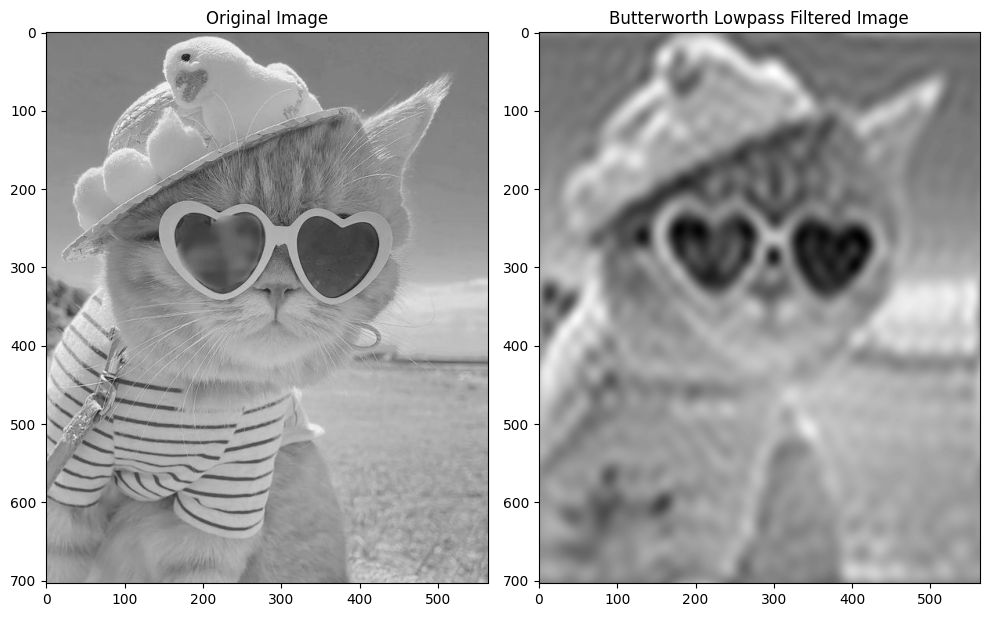

In [ ]:


def butterworth_lowpass_filter(image, cutoff_freq, order):
    # Convert image to frequency domain
    fft_image = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft_image)

    # Create Butterworth lowpass filter
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols))
    mask[center_row - cutoff_freq:center_row + cutoff_freq,
         center_col - cutoff_freq:center_col + cutoff_freq] = 1

    # Apply filter in frequency domain
    filtered_shifted = fft_shifted * mask

    # Convert filtered image back to spatial domain
    filtered_image = np.fft.ifftshift(filtered_shifted)
    filtered_image = np.fft.ifft2(filtered_image).real

    # Clip values to range [0, 255]
    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image.astype(np.uint8)

# Load image
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Define cutoff frequency and filter order
cutoff_frequency = 20
order = 2

# Apply Butterworth lowpass filter
filtered_image = butterworth_lowpass_filter(image, cutoff_frequency, order)

# Display the original image and the filtered image
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Butterworth Lowpass Filtered Image')

plt.tight_layout()
plt.show()

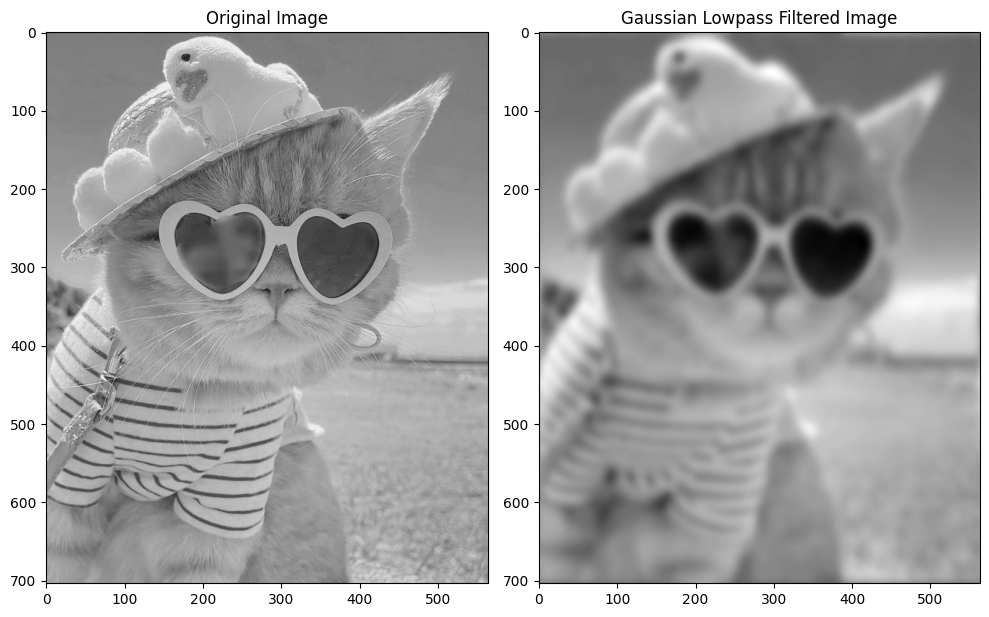

In [ ]:


def gaussian_lowpass_filter(image, cutoff_freq):
    # Convert image to frequency domain
    fft_image = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft_image)

    # Create Gaussian lowpass filter
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    x = np.arange(-center_col, cols - center_col)
    y = np.arange(-center_row, rows - center_row)
    xx, yy = np.meshgrid(x, y)
    sigma = cutoff_freq / np.sqrt(2 * np.log(2))
    mask = np.exp(-(xx ** 2 + yy ** 2) / (2 * sigma ** 2))

    # Apply filter in frequency domain
    filtered_shifted = fft_shifted * mask

    # Convert filtered image back to spatial domain
    filtered_image = np.fft.ifftshift(filtered_shifted)
    filtered_image = np.fft.ifft2(filtered_image).real

    # Clip values to range [0, 255]
    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image.astype(np.uint8)

# Load image
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Define cutoff frequency
cutoff_frequency = 20

# Apply Gaussian lowpass filter
filtered_image = gaussian_lowpass_filter(image, cutoff_frequency)

# Display the original image and the filtered image
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Lowpass Filtered Image')

plt.tight_layout()
plt.show()

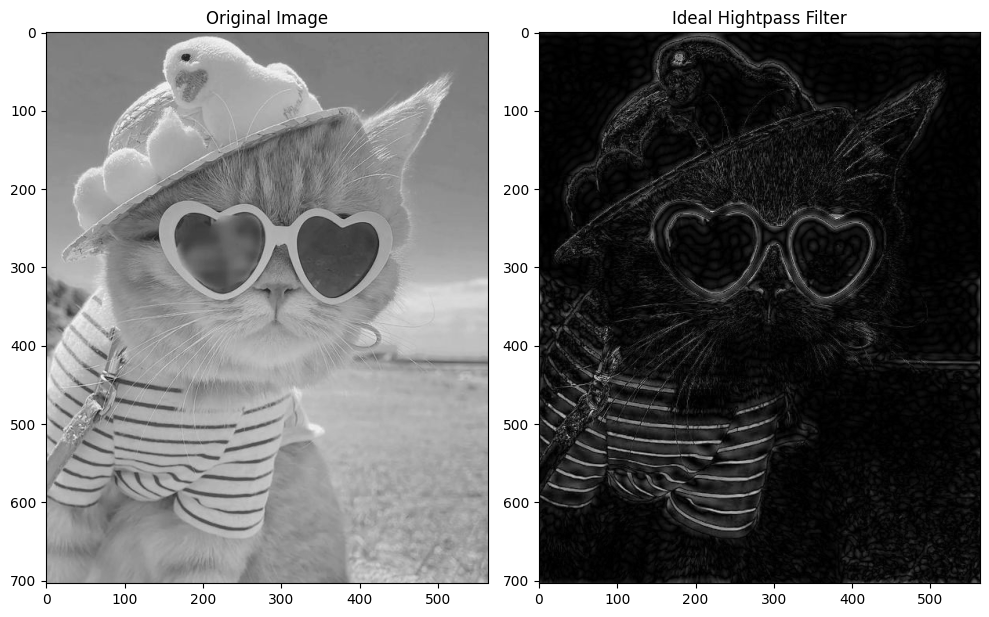

In [ ]:

# Load the image in grayscale
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Fourier transformation
fft = np.fft.fft2(image)
shifted_fft = np.fft.fftshift(fft)

# Create Ideal highpass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
cutoff_frequency = 30  # Cutoff frequency

# Create a meshgrid of distances from the center
x = np.linspace(-ccol, cols - ccol - 1, cols)
y = np.linspace(-crow, rows - crow - 1, rows)
X, Y = np.meshgrid(x, y)
distance = np.sqrt(X**2 + Y**2)

# Create the Ideal highpass filter
ideal_highpass_filter = np.ones((rows, cols))
ideal_highpass_filter[distance < cutoff_frequency] = 0

# Apply the filter to the Fourier spectrum
filtered_fft = shifted_fft * ideal_highpass_filter

# Shift back the filtered spectrum
filtered_fft_shift = np.fft.ifftshift(filtered_fft)

# Perform inverse Fourier transformation
filtered_image = np.fft.ifft2(filtered_fft_shift)
filtered_image = np.abs(filtered_image)

# Normalize and adjust pixel range
filtered_image = filtered_image / np.max(filtered_image)
filtered_image = (filtered_image * 255).astype(np.uint8)

# Display the original image and the filtered image
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Ideal Hightpass Filter')

plt.tight_layout()
plt.show()

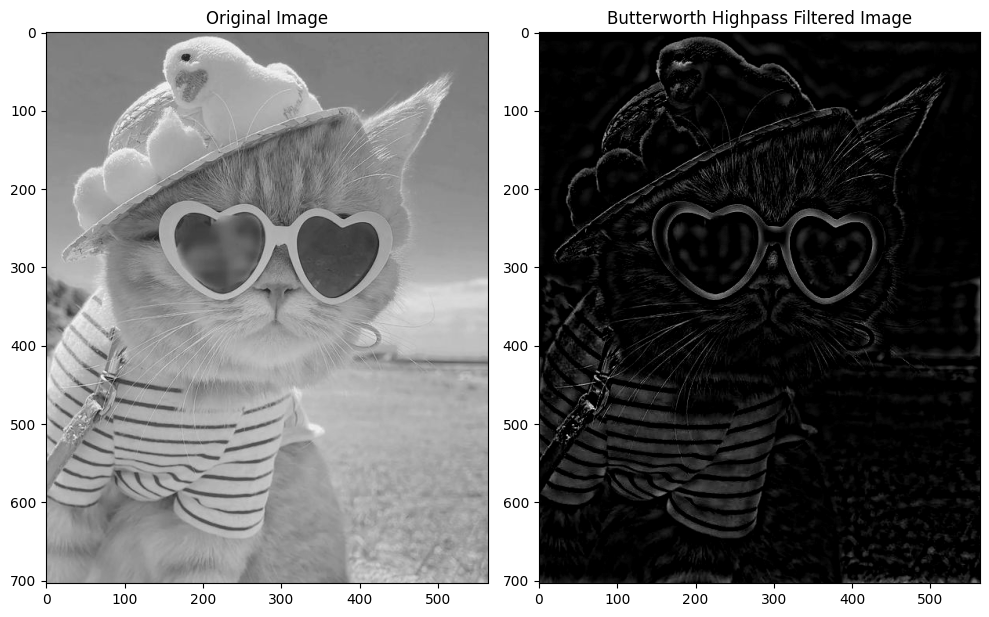

In [ ]:


def butterworth_highpass_filter(image, cutoff_freq, order):
    # Convert image to frequency domain
    fft_image = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft_image)

    # Create Butterworth highpass filter
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols))
    mask[center_row - cutoff_freq:center_row + cutoff_freq,
         center_col - cutoff_freq:center_col + cutoff_freq] = 0

    # Apply filter in frequency domain
    filtered_shifted = fft_shifted * mask

    # Convert filtered image back to spatial domain
    filtered_image = np.fft.ifftshift(filtered_shifted)
    filtered_image = np.fft.ifft2(filtered_image).real

    # Clip values to range [0, 255]
    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image.astype(np.uint8)

# Load image
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Define cutoff frequency and filter order
cutoff_frequency = 20
order = 2

# Apply Butterworth highpass filter
filtered_image = butterworth_highpass_filter(image, cutoff_frequency, order)

# Display the original image and the filtered image
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Butterworth Highpass Filtered Image')

plt.tight_layout()
plt.show()

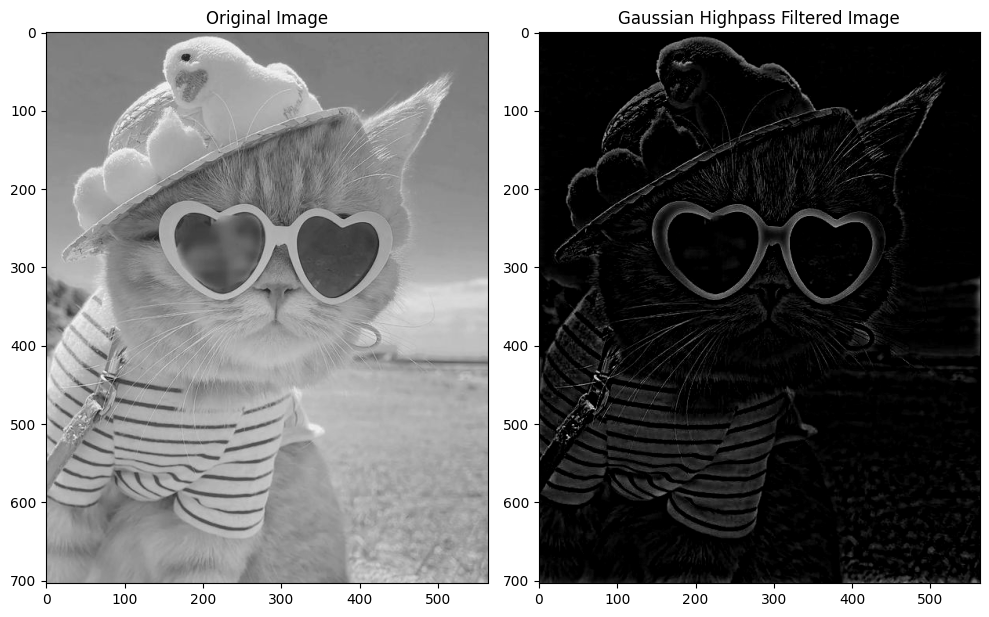

In [ ]:
def gaussian_highpass_filter(image, cutoff_freq):
    # Convert image to frequency domain
    fft_image = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft_image)

    # Create Gaussian highpass filter
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    x = np.arange(-center_col, cols - center_col)
    y = np.arange(-center_row, rows - center_row)
    xx, yy = np.meshgrid(x, y)
    sigma = cutoff_freq / np.sqrt(2 * np.log(2))
    mask = 1 - np.exp(-(xx ** 2 + yy ** 2) / (2 * sigma ** 2))

    # Apply filter in frequency domain
    filtered_shifted = fft_shifted * mask

    # Convert filtered image back to spatial domain
    filtered_image = np.fft.ifftshift(filtered_shifted)
    filtered_image = np.fft.ifft2(filtered_image).real

    # Clip values to range [0, 255]
    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image.astype(np.uint8)

# Load image
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Define cutoff frequency
cutoff_frequency = 20

# Apply Gaussian highpass filter
filtered_image = gaussian_highpass_filter(image, cutoff_frequency)

# Display the original image and the filtered image
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Highpass Filtered Image')

plt.tight_layout()
plt.show()

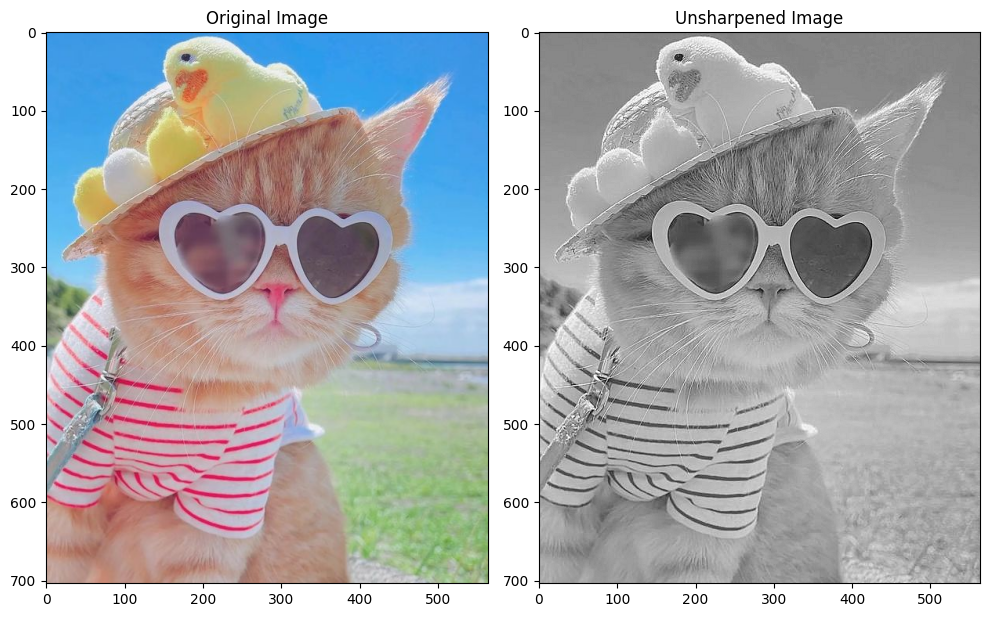

In [ ]:


def unsharp_masking(image, blur_kernel_size, strength):
    # Convert image to float32
    image = image.astype(np.float32)

    # Apply Gaussian blur to the image
    blurred = cv2.GaussianBlur(image, (blur_kernel_size, blur_kernel_size), 0)

    # Calculate the high-pass filtered image
    highpass = image - blurred

    # Scale the high-pass image by the strength factor
    sharpened = image + highpass * strength

    # Clip the pixel values to the valid range [0, 255]
    sharpened = np.clip(sharpened, 0, 255)

    # Convert the image back to uint8
    sharpened = sharpened.astype(np.uint8)

    return sharpened

# Load the image
image = cv2.imread('/content/oyencat.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply unsharp masking
sharpened = unsharp_masking(gray, blur_kernel_size=5, strength=1.5)

# Display the original and sharpened images
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened, cmap='gray')
plt.title('Unsharpened Image')

plt.tight_layout()
plt.show()

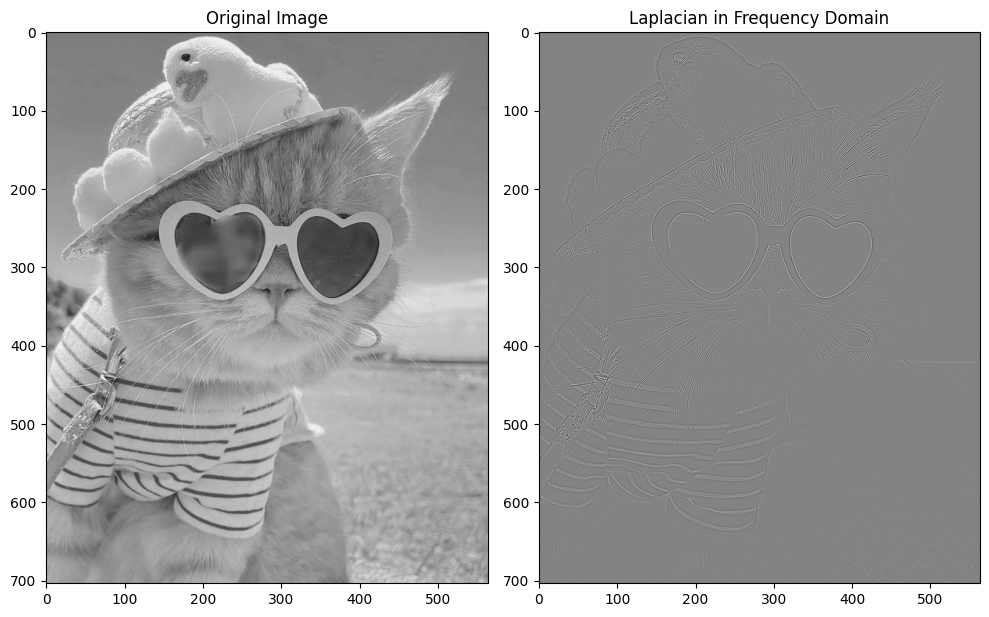

In [2]:
import cv2
import matplotlib.pyplot as plt

def laplacian_frequency(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return laplacian

# Load image
image = cv2.imread('/content/oyencat.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian in Frequency Domain
laplacian_result = laplacian_frequency(image)

# Display the original image and the Laplacian result
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_result, cmap='gray')
plt.title('Laplacian in Frequency Domain')

plt.tight_layout()
plt.show()


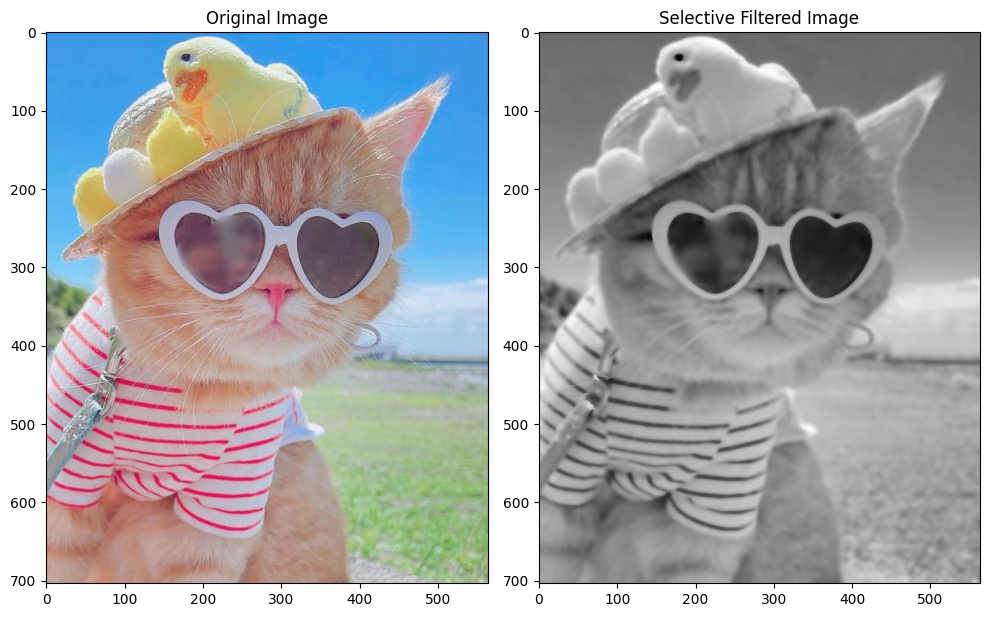

In [3]:


def selective_filter(image):
    filtered_image = cv2.bilateralFilter(image, 9, 75, 75)

    return filtered_image

# Load image
image = cv2.imread('/content/oyencat.jpg')

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply selective filtering
filtered_image = selective_filter(gray_image)

# Display the original image and the filtered image
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Selective Filtered Image')

plt.tight_layout()
plt.show()